# Statystyka opisowa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

## Statystyki próbkowe i metody opisu danych jakościowych

## Zadanie - podstawowe statystyki
Zaimplementować klase `Stats`, która posiada metody do wyznaczenia:

a) średniej arytmetycznej,
b) mediany,
c) wariancji,
d) odchylenia standardowego


dla dowolnych danych $X$.

In [2]:
class Stats:
    
    def __init__(self, vec):
        self.vec = vec
    
    def mean(self):
        return np.mean(self.vec)
    
    def median(self):
        return np.median(self.vec)
    
    def var(self):
        return np.var(self.vec, ddof=1)
    
    def std(self):
        return np.std(self.vec, ddof=1)
        
    def iqr(self):
        return np.percentile(self.vec, 75) - np.percentile(self.vec, 25)
    
    def min_(self):
        return np.min(self.vec)
    
    def max_(self):
        return np.max(self.vec)
    
    def q1(self):
        return np.percentile(self.vec, 25)
    
    def q3(self):
        return np.percentile(self.vec, 75)
        
    def range_(self):
        return np.max(self.vec) - np.min(self.vec)

In [3]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
stats = Stats(a)
stats.mean()

5.5

## Zadanie - boxplot, szereg rozdzielczy, histogram
Firma budowlana zainteresowana jest jakością betonu. Jedną z pożądanych cech jest jego odpowiednia wytrzymałość na ściskanie. Aby sprawdzić, czy beton proponowany przez dostawcę spełnia normy jakości, przebadano 50 próbek i otrzymano następujące wyniki wytrzymałości na ściskanie:
6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7, 12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7, 25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9, 17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6, 24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4, 14.1, 18.1, 23. , 14.9, 27.3.

In [4]:
beton = np.array([6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7, 
                   12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7, 
                   25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9, 
                   17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6, 
                   24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4, 
                   14.1, 18.1, 23. , 14.9, 27.3])

a) Obliczyć podstawowe statystyki próbkowe.

In [5]:
stats = Stats(beton)
print(f"mean: {stats.mean()} \n median: {stats.median()} \n var: {stats.var()} \n std: {stats.std()} \n \
        iqr: {stats.iqr()} \n min: {stats.min_()} \n max: {stats.max_()} \n q1: {stats.q1()} \n q3: {stats.q3()} \n \
        range: {stats.range_()}")

mean: 19.29 
 median: 19.05 
 var: 24.535204081632656 
 std: 4.953302341027919 
         iqr: 7.049999999999999 
 min: 6.2 
 max: 27.7 
 q1: 15.65 
 q3: 22.7 
         range: 21.5


b) Sporządzić i opisać wykres skrzynkowy.

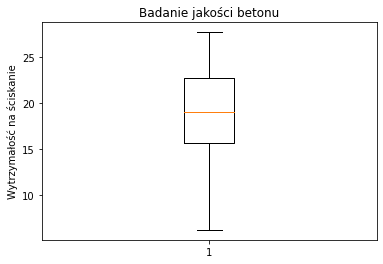

In [6]:
plt.boxplot(beton)
plt.title("Badanie jakości betonu")
plt.ylabel("Wytrzymałość na ściskanie")
plt.show()

c) ***Zbudować szereg rozdzielczy.

In [7]:
n = beton.size
print(n)

# wyznaczamy liczbę klas
left_k = 0.75 * np.sqrt(n)
right_k = np.sqrt(n)
print(left_k, right_k) # => k = 6

k = 6

# wyznaczamy długośc klasy
bmin = beton.min()
bmax = beton.max()

d = np.round((bmax - bmin) / k, 2)
print(d)

50
5.303300858899107 7.0710678118654755
3.58


In [8]:
np.arange(bmin, bmax, d)

array([ 6.2 ,  9.78, 13.36, 16.94, 20.52, 24.1 , 27.68])

In [9]:
# wyznaczamy przedzialy klas
left_bound = np.round(np.arange(bmin, bmax, d)[:k], 2)

intervals = []
n_size = np.zeros(k)

# wyznaczamy szereg rozdzielczy
make_interval = lambda x, y: "[{}, {})".format(x, y)  # przedział prawostronnie otwarty
make_closed_interval = lambda x, y: "[{}, {}]".format(x, y)  # przedział obustronnie domknięty

for i in range(k-1):
    l, r = left_bound[i], left_bound[i+1]
    intervals.append(make_interval(l, r))
    n_size[i] = np.sum((beton >= l) & (beton < r))
         
l, r = left_bound[k-1], bmax
intervals.append(make_closed_interval(l, r))
n_size[k-1] = np.sum((beton >= l) & (beton <= r))

f = n_size / beton.size
frequency_distribution = pd.DataFrame({'Interval': np.array(intervals), 
                                       'n': n_size, 'f': f, 
                                      'cn': np.cumsum(n_size), 'cf': np.cumsum(f)})
frequency_distribution

,Interval,n,f,cn,cf
0,"[6.2, 9.78)",2.0,0.04,2.0,0.04
1,"[9.78, 13.36)",3.0,0.06,5.0,0.10
2,"[13.36, 16.94)",11.0,0.22,16.0,0.32
3,"[16.94, 20.52)",11.0,0.22,27.0,0.54
4,"[20.52, 24.1)",13.0,0.26,40.0,0.80
5,"[24.1, 27.7]",10.0,0.20,50.0,1.00


d) Narysować histogram liczności.

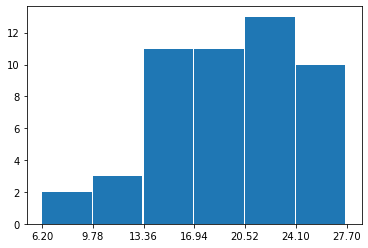

In [10]:
hist_data = plt.hist(beton, bins=k, width=3.5, align='mid')  # ręczny dobór szerokości
# hist_data = plt.hist(beton, bins=k, align='mid', ec='white')
plt.xticks(list(left_bound) + [bmax], rotation=0)
plt.show()

e) Narysować histogram skumulowanych liczności.

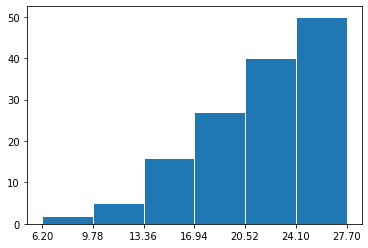

In [11]:
hist_data = plt.hist(beton, bins=k, cumulative=True, align='mid', ec='white')  # automatyczny dobór szerokości
# hist_data = plt.hist(beton, bins=k, cumulative=True, align='mid', ec='white', density=True)  # to samo dla częstości
plt.xticks(list(left_bound) + [bmax], rotation=0)
plt.show()

## Zadanie - porównanie średniej arytmetycznej i mediany
Wczytaj dane `stats1.csv` opisujące pomiar pewnej długości przez dwóch różnych ekspertów. Porównaj ich rozkład oraz statystyki próbkowe.

In [12]:
stats1 = pd.read_csv('../data/stats1.csv')
stats1.head(5)

,x,y
0,10.968388,10.481487
1,11.035494,13.211230
2,3.805479,3.954873
3,3.402634,5.367647
4,7.527793,7.234025


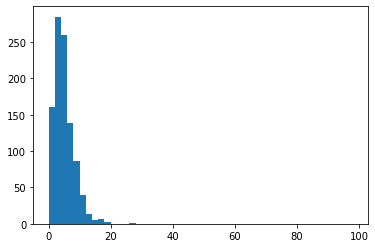

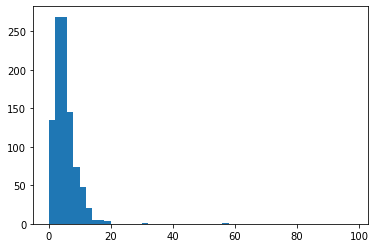

In [13]:
#histogramy
plt.hist(stats1.x, bins=np.arange(0, 100, 2))
plt.show()
plt.hist(stats1.y, bins=np.arange(0, 100, 2))  # tu występuje kilka pomiarów powyżej 100 (outliers?)
plt.show()

In [14]:
pd.DataFrame({'x': stats1.x, 'y': stats1.y}).describe()

,x,y
count,1000.000000,1000.000000
mean,4.956962,6.523673
std,3.165879,28.577406
min,0.289994,-1.198420
25%,2.660315,2.736644
50%,4.414328,4.530463
75%,6.575814,6.822966
max,27.866537,808.876344


In [15]:
# stats1.y[np.where(stats1.y > np.quantile(stats1.y, 0.99))[0]]
stats1.y[stats1.y > np.quantile(stats1.y, 0.99)]  # tylko 1% największych wartości

103     30.095229
158    808.876344
240     17.864930
323     18.376594
380     99.305207
467     56.603880
524     18.773622
592    214.653314
658     18.098880
699    329.789401
Name: y, dtype: float64

## Zadanie - współczynnik rozproszenia
Wczytaj dane `stats2.csv` zawierające pomiary wagi słoni i myszy w pewnym zoo (w gramach). Wyznacz statystyki próbkowe i oceń, która próbka, opisująca wagę słoni, czy opisująca wagę myszy, ma większe rozproszenie wartości.

In [16]:
weight = pd.read_csv('../data/stats2.csv')
weight.head(5)

,elephant,mouse
0,3883240.0,21.0
1,4046450.0,18.0
2,4152119.0,22.0
3,2578306.0,23.0
4,3597481.0,25.0


In [17]:
weight.describe()

,elephant,mouse
count,1.000000e+02,100.000000
mean,4.017328e+06,20.470000
std,4.998078e+05,2.886594
min,2.578306e+06,13.000000
25%,3.685120e+06,19.000000
50%,4.046994e+06,20.000000
75%,4.380402e+06,22.000000
max,5.246947e+06,27.000000


In [18]:
print(f"elephant_std: {round(weight.elephant.std(), 2)}, mouse_std: {round(weight.mouse.std(), 2)}")

elephant_std: 499807.85, mouse_std: 2.89


In [19]:
# inny sposób
weight.describe().loc['std']

elephant    499807.845364
mouse            2.886594
Name: std, dtype: float64

**Uwaga**: W sytuacji, gdy chcemy porównanć rozrzut dwóch lub więcej prób, nieraz wygodniej jest skorzystać ze względnej miary rozproszenia - **współczynnika rozproszenia**:
$$
V = \frac{S}{\overline{X}}\cdot 100\%.
$$

In [20]:
print(f"norm_elephant_std: {round(100 * weight.elephant.std() / weight.elephant.mean(), 2)}% \
        norm_mouse_std: {round(100 * weight.mouse.std() / weight.mouse.mean(), 2)}%")

norm_elephant_std: 12.44%         norm_mouse_std: 14.1%


In [21]:
100 * weight.describe().loc['std'] / weight.describe().loc['mean']

elephant    12.441300
mouse       14.101582
dtype: float64

## Miara korelacji — współczynnik korelacji Pearsona

W przypadku jednoczesnego badania dwóch cech pewnej populacji naszą próbą jest ciąg par $$(X_1, Y_1),\ldots,(X_n, Y_n),$$ gdzie $X_i$ oraz $Y_i$ oznaczają, odpowiednio, wartości pierwszej i drugiej cechy przyjmowane przez $i$-ty element próby.

Wówczas **współczynnik korelacji Pearsona** jest dany wzorem
\begin{equation*}
    r = \frac{\sum_{i=1}^n(X_i-\overline{X})(Y_i-\overline{Y})}{\sqrt{\sum_{i=1}^n(X_i-\overline{X})^2\sum_{i=1}^n(Y_i-\overline{Y})^2}}.
\end{equation*}

In [22]:
from scipy import stats
# dokumentacja! ('Shift' + 'Tab')
?np.corrcoef

## Zadanie - korelacja liniowa
Wygeneruj próbkę $X$ z wybranego przez siebie rozkładu i oblicz wartość elementów próbki $Y$ zgodnie ze wzorem

a) $Y = X$,

b) $Y = 5X$,

c) $Y = -5X$,

d) $Y = X^2$,

f) $Y = \exp(X)$,

g) $Y = \sin(X)$, 

a następnie oblicz współczynnik korelacji pomiędzy zmiennymi $X$ i $Y$.

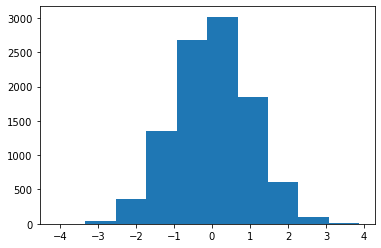

In [23]:
x = stats.norm.rvs(size=10000, loc=0, scale=1)
plt.hist(x)
plt.show()

In [24]:
f1 = lambda x: x
f2 = lambda a, x: a * x
f3 = lambda a, x: x ** a
f4 = lambda x: np.exp(x)
f5 = lambda x: np.sin(x)

ya = f1(x)
yb = f2(5, x)
yc = f2(-5, x)
yd = f3(2, x)
yf = f4(x)
yg = f5(x)

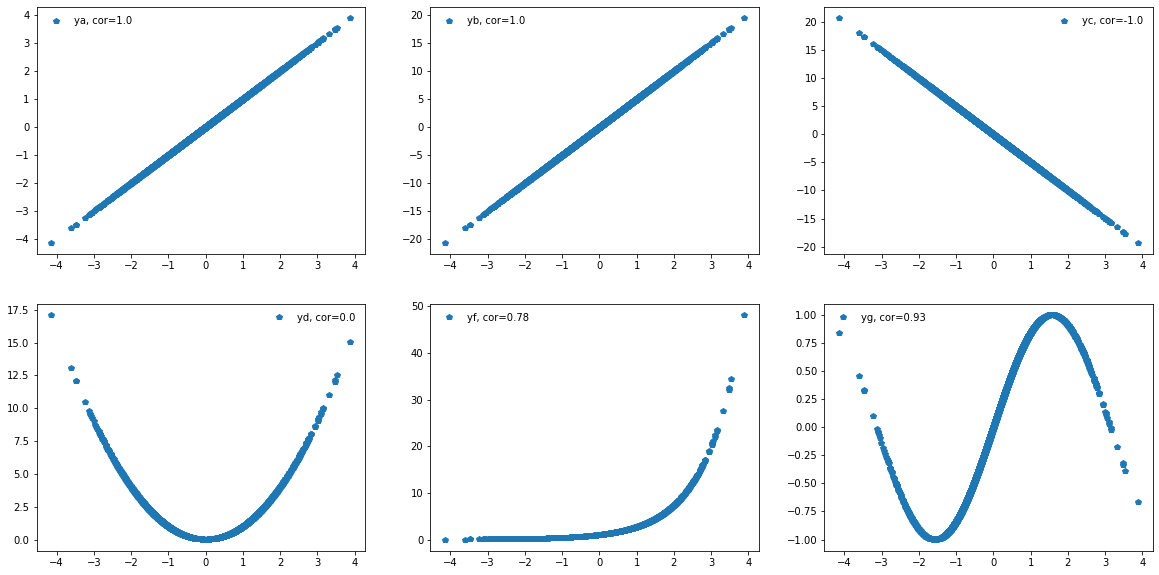

In [25]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].plot(x, ya, "p", label="ya, cor={}".format(np.round(np.corrcoef(x, ya)[0, 1], 2)))  # [0, 1] to wsp. korelacji
ax[0, 0].legend(loc='best', frameon=False)

ax[0, 1].plot(x, yb, "p", label="yb, cor={}".format(np.round(np.corrcoef(x, yb)[0, 1], 2)))
ax[0, 1].legend(loc='best', frameon=False)

ax[0, 2].plot(x, yc, "p", label="yc, cor={}".format(np.round(np.corrcoef(x, yc)[0, 1], 2)))
ax[0, 2].legend(loc='best', frameon=False)

ax[1, 0].plot(x, yd, "p", label="yd, cor={}".format(np.round(np.corrcoef(x, yd)[0, 1], 2)))
ax[1, 0].legend(loc='best', frameon=False)

ax[1, 1].plot(x, yf, "p", label="yf, cor={}".format(np.round(np.corrcoef(x, yf)[0, 1], 2)))
ax[1, 1].legend(loc='best', frameon=False)

ax[1, 2].plot(x, yg, "p", label="yg, cor={}".format(np.round(np.corrcoef(x, yg)[0, 1], 2)))
ax[1, 2].legend(loc='best', frameon=False)

plt.show()

## Zadanie - korelacja liniowa
Wygeneruj $n$ par niezależnych zmiennych losowych, dla każdej z nich wyznacz współczynnik korelacji, a następnie sprawdź rozkład otrzymanych współczynników.

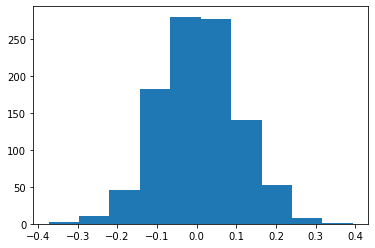

In [103]:
n = 1000
corr_list = []

for i in range(n):
    
    x1 = stats.norm.rvs(size=100, loc=0, scale=1)
    x2 = stats.norm.rvs(size=100, loc=0, scale=1)
    corr_list.append(np.corrcoef(x1, x2)[0, 1])
    
plt.hist(corr_list)
plt.show()

## Zadanie - do domu
Wczytaj zbiór danych `boston_prediction.csv`, który zawiera dane z predykcji dwóch modeli cen mieszkań w Bostonie (więcej na temat zbioru, na podstawie, którego zbudowano modele możesz przeczytać, np. https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html).

Oceń jakość predykcji obu modeli: policz średnią, medianę, kwantyl rzędu 90% oraz odchylenie standardowe dla błędu bezwzględnego i względnego oraz korelację wartości przewidywanych z prawdziwymi. Wyciągnąć wnioski na temat działania obu modeli.

**Wskazówka**:

**Błąd bezwzględny** liczymy ze wzoru:
$$
\Delta x = |x-x_0|.
$$

**Błąd względny** liczymy ze wzoru:
$$
\delta = \frac{\Delta x}{x}.
$$

Oznaczenia: $x$ - wartość dokładna, $x_0$ - wartość zmierzona.

In [29]:
# dane zostały usunięte z przyczyn etycznych !! (alternatywnie można użyć innego zbioru, według podanych wskazówek)

# from sklearn.datasets import load_boston
# X, y = load_boston(return_X_y=True)

In [28]:
boston_pred = pd.read_csv("../data/boston_prediction.csv")
boston_pred.head(5)

,price,model_pred,model_pred2
0,24.0,30.0,27.4
1,21.6,25.0,21.7
2,34.7,30.6,33.7
3,33.4,28.6,33.7
4,36.2,27.9,33.7


In [31]:
bezwzgl_1 = np.abs(boston_pred.model_pred - boston_pred.model_pred.mean())
wzgl_1 = bezwzgl_1 / boston_pred.model_pred

bezwzgl_2 = np.abs(boston_pred.model_pred2 - boston_pred.model_pred2.mean())
wzgl_2 = bezwzgl_2 / boston_pred.model_pred2

In [81]:
print(f"Model 1: \n średnia: {boston_pred.model_pred.mean()} \n mediana {boston_pred.model_pred.median()} \n kwantyl 90%: \
      {np.percentile(boston_pred.model_pred, 90)} \n błąd bezwzględny: {bezwzgl_1.std()} \n błąd względny: \
      {wzgl_1.std()} \n korelacja: {np.corrcoef(boston_pred.price, boston_pred.model_pred)[0, 1]}")

Model 1: 
 średnia: 22.53201581027668 
 mediana 22.1 
 kwantyl 90%:       33.3 
 błąd bezwzględny: 4.915218074115093 
 błąd względny:       1.4530323465929194 
 korelacja: 0.8606612985241792


In [82]:
print(f"Model 2: \n średnia: {boston_pred.model_pred2.mean()} \n mediana {boston_pred.model_pred2.median()} \
        \n kwantyl 90%: {np.percentile(boston_pred.model_pred2, 90)} \n błąd bezwzględny: {bezwzgl_2.std()} \
        \n błąd względny: {wzgl_2.std()} \n korelacja: {np.corrcoef(boston_pred.price, boston_pred.model_pred2)[0, 1]}")

Model 2: 
 średnia: 22.539920948616597 
 mediana 21.7         
 kwantyl 90%: 33.7 
 błąd bezwzględny: 5.7782138776073975         
 błąd względny: 0.2833896875604169 
 korelacja: 0.8986422163603677
